In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import os
import re
FILE_PATHS = [os.path.join(dirname, filename) \
              for dirname, _, filenames in os.walk('/kaggle/input')\
              for filename in filenames]

In [13]:
import sqlite3
import pandas as pd
import re
import os

# Path where your CSV files are uploaded in Colab (e.g., '/content/')
csv_directory = '/content/'  # Update this to your folder where CSVs are stored

# List all CSV files in the directory
FILE_PATHS = [os.path.join(csv_directory, f) for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('/content/paintings.db')

# Extract table names from the file paths
table_names = [re.findall(r"/([^/]+)\.csv$", path)[0] for path in FILE_PATHS]

# Loop through each file and upload it to SQLite
for idx, path in enumerate(FILE_PATHS):
    # Read CSV into pandas DataFrame
    globals()[f"{table_names[idx]}"] = pd.read_csv(path)

    # Save the DataFrame to the SQLite database
    globals()[f"{table_names[idx]}"].to_sql(table_names[idx], conn, if_exists='replace', index=False)

    # Print confirmation
    print(f"Table {idx+1} : {table_names[idx]} created")

# Don't forget to close the database connection after you're done



Table 1 : subject created
Table 2 : product_size created
Table 3 : work created
Table 4 : canvas_size created
Table 5 : image_link created
Table 6 : museum_hours created
Table 7 : museum created
Table 8 : artist created


In [14]:
subject.head()

,work_id,subject
0,160228,Still-Life
1,160236,Still-Life
2,160244,Still-Life
3,160252,Still-Life
4,160260,Still-Life


In [15]:
museum_hours.head()

,museum_id,day,open,close
0,30,Sunday,10:30:AM,05:30:PM
1,30,Monday,10:30:AM,05:30:PM
2,30,Tuesday,10:30:AM,05:30:PM
3,30,Wednesday,10:30:AM,05:30:PM
4,30,Thusday,10:30:AM,05:30:PM


In [16]:
artist.head()

,artist_id,full_name,first_name,middle_names,last_name,nationality,style,birth,death
0,500,Pierre-Auguste Renoir,Pierre,Auguste,Renoir,French,Impressionist,1841,1919
1,501,Alexandre Cabanel,Alexandre,NaN,Cabanel,French,Classicist,1823,1889
2,502,James Ensor,James,NaN,Ensor,Belgian,Expressionist,1860,1949
3,503,Maximilien Luce,Maximilien,NaN,Luce,French,Pointillist,1858,1941
4,504,August Macke,August,NaN,Macke,German,Expressionist,1887,1914


In [17]:
product_size.head()


,work_id,size_id,sale_price,regular_price
0,160228,24,85,85
1,160228,30,95,95
2,160236,24,85,85
3,160236,30,95,95
4,160244,24,85,85


In [9]:
image_link.head()


,work_id,url,thumbnail_small_url,thumbnail_large_url
0,181978,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
1,173188,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
2,194065,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
3,129337,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
4,141073,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...


In [18]:
work.head()


,work_id,name,artist_id,style,museum_id
0,160228,Still Life with Flowers and a Watch,615,Baroque,43.0
1,160236,Still Life with Fruit and a Beaker on a Cock's...,615,Baroque,43.0
2,160244,Still Life with Fruit and a Goldfinch,615,Baroque,43.0
3,160252,Still Life with Fruit and Oysters,615,Baroque,43.0
4,160260,"Still Life with Fruit, Oysters, and a Porcelai...",615,Baroque,43.0


In [19]:
canvas_size.head()


,size_id,width,height,label
0,20,20,NaN,"20"" Long Edge"
1,24,24,NaN,"24"" Long Edge"
2,30,30,NaN,"30"" Long Edge"
3,36,36,NaN,"36"" Long Edge"
4,40,40,NaN,"40"" Long Edge"


Q1) Fetch all the paintings which are not displayed on any museums?

In [20]:
query = '''
select distinct name from work where museum_id is null
'''
not_displayed = pd.read_sql(query, conn)
not_displayed.head()

,name
0,Arabian Horses at Pasture
1,Count Halm on His Basedow Estate
2,Napoleon Before the Burning City of Smolensk
3,Peasants Resting in the Field
4,Portrait Oberleutnant Theodor Von Klein


In [21]:
rows, _ = not_displayed.shape
print(f"There are {rows:,} paintings that are not displayed in any museum")

There are 9,425 paintings that are not displayed in any museum


2) Are there museuems without any paintings?

In [22]:
query = '''
select t1.name, count(t2.work_id) as count from museum t1 left join work t2
on t1.museum_id = t2.museum_id and t2.museum_id is not null
group by 1
having count(t2.work_id) = 0
order by 2 desc
'''
no_paintings = pd.read_sql(query, conn)
no_paintings

,name,count


Q3) How many paintings have an asking price of more than their regular price?

In [23]:
query = '''
select count(work_id) as exp_paintings from product_size where regular_price < sale_price

'''
exp_count =  pd.read_sql(query, conn)
exp_count

,exp_paintings
0,0


Q4) Identify the paintings whose asking price is less than 50% of its regular price.

In [24]:
query = '''
with cte as (
select work_id as exp_paintings, sale_price from product_size where sale_price < regular_price * 0.5)

select distinct t2.name, t1.sale_price from cte t1 join work t2 on t1.exp_paintings = t2.work_id
order by t1.sale_price desc

'''
exp_count =  pd.read_sql(query, conn)
exp_count.head()

,name,sale_price
0,A Street in Paris in May 1871,1025
1,Les Batteurs de Pieux Entre,965
2,Rest on the Flight Into Egypt,635
3,Young Girl Standing in Front of a Wheatfield,615
4,Passion Flowers and Hummingbirds,585


In [25]:
rows = exp_count.name.nunique()
print(f"There are {rows} paintings whose asking price is less than 50% of its regular price.")

There are 34 paintings whose asking price is less than 50% of its regular price.


Q5) Which canva size costs the most?

In [26]:
query = '''
select t1.label as canvas_size, t2.sale_price
from canvas_size t1 left join product_size t2 on t1.size_id = t2.size_id
where t2.sale_price = (select max(sale_price) from product_size)
'''
max_canva = pd.read_sql(query, conn)
max_canva

,canvas_size,sale_price
0,"48"" x 96""(122 cm x 244 cm)",1115


Q6) Delete duplicate records from work, product_size, subject and image_link tables

In [27]:
query = '''
with cte as (
select artist_id, work_id, row_number() over(partition by artist_id, work_id) as rn from work)

select * from work where work_id in (
SELECT work_id
    FROM cte
    WHERE rn > 1)
'''
duplicates = pd.read_sql(query, conn)
duplicates.head()

,work_id,name,artist_id,style,museum_id
0,122691,Landscape with a Sunlit Stream,862,Realism,None
1,122662,The Dunes at Camiers,862,Realism,None
2,181576,Black and White and Grey,770,None,None
3,181403,"Black Stripe, Red Stripe",770,None,None
4,181585,"Black, White Stripe, Green On Pink",770,None,None


In [28]:
query = '''
with cte as (
select work_id, size_id, row_number() over(partition by work_id, size_id) as rn from product_size)

select *, count(work_id) over(partition by work_id, size_id) as duplicate_count
from product_size
where work_id in (SELECT work_id
                    FROM cte
                    WHERE rn > 1)
'''
duplicates = pd.read_sql(query, conn)
duplicates.head()

,work_id,size_id,sale_price,regular_price,duplicate_count
0,23448,20,75,75,2
1,23448,20,75,75,2
2,23448,24,85,85,2
3,23448,24,85,85,2
4,23448,30,95,95,2


In [29]:
#duplicate record
product_size.query('work_id==23448 & size_id=="24"')


,work_id,size_id,sale_price,regular_price
29,23448,24,85,85
495,23448,24,85,85


In [30]:
query = '''
with cte as (
select work_id, row_number() over(partition by work_id) as rn from image_link)

select * from image_link where work_id in (
SELECT work_id
    FROM cte
    WHERE rn > 1)
'''
duplicates = pd.read_sql(query, conn)
duplicates.head()

,work_id,url,thumbnail_small_url,thumbnail_large_url
0,181891,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
1,181820,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
2,181813,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
3,122662,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
4,181791,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...


In [31]:
#duplicate
image_link.query('work_id==181891')

,work_id,url,thumbnail_small_url,thumbnail_large_url
11,181891,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...
7198,181891,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...,https://v5.airtableusercontent.com/v1/15/15/16...


In [32]:
query = '''
with cte as (
select work_id,subject, row_number() over(partition by work_id, subject) as rn from subject)

select * from subject where work_id in (
SELECT work_id
    FROM cte
    WHERE rn > 1)
'''
duplicates = pd.read_sql(query, conn)
duplicates.head()

,work_id,subject
0,122662,Seascapes
1,181576,Abstract/Modern Art
2,181403,Abstract/Modern Art
3,181585,Abstract/Modern Art
4,181791,Abstract/Modern Art


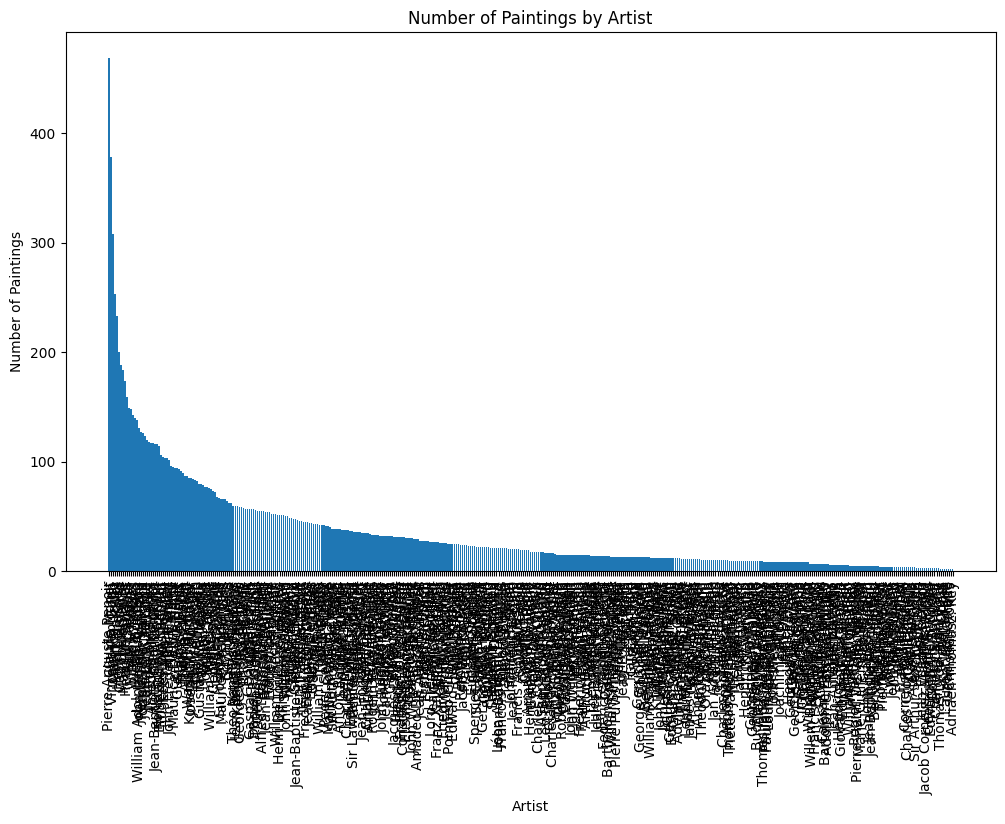

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('paintings.db')

# Execute the SQL query
query = """
SELECT artist.full_name, COUNT(work.work_id) AS painting_count
FROM artist
JOIN work ON artist.artist_id = work.artist_id
GROUP BY artist.full_name
ORDER BY painting_count DESC
"""
artist_data = pd.read_sql(query, conn)

# Plot the data
plt.figure(figsize=(12, 7))
plt.bar(artist_data['full_name'], artist_data['painting_count'])
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Number of Paintings')
plt.title('Number of Paintings by Artist')
plt.show()

In [38]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()
print("Tables in the database:")
for table in tables:
    print(table[0])


Tables in the database:
subject
product_size
work
canvas_size
image_link
museum_hours
museum
artist


Q7) Identify the museums with invalid city information in the given dataset

In [44]:
query = '''
select distinct museum_id, name, city, state, country from museum where cast(city as integer) !=0
'''
invalid_museum_name = pd.read_sql(query, conn)
invalid_museum_name

,museum_id,name,city,state,country
0,34,The State Hermitage Museum,2,Sankt-Peterburg,Russia
1,36,Museum Folkwang,45128,Essen,Germany
2,37,Museum of Grenoble,38000,Grenoble,France
3,38,Musée des Beaux-Arts de Quimper,29000,Quimper,France
4,40,Musée du Louvre,75001,Paris,France
5,74,Kröller-Müller Museum,6731 AW Otterlo,None,Netherlands


Q8) Museum_Hours table has 1 invalid entry. Identify it and remove it

In [45]:
query = '''
select * from museum_hours where close like '___:00:PM'
'''
invalid_row = pd.read_sql(query, conn)
invalid_row

,museum_id,day,open,close
0,73,Thusday,01:00:PM,08 :00:PM


Q9) Fetch the top 10 most famous painting subject

In [46]:
query = '''
select t1.subject,
       count(t2.work_id) as count
from subject t1 left join work t2 on t1.work_id = t2.work_id
group by 1
order by 2 desc
limit 10
'''
paint_subjects = pd.read_sql(query, conn)
paint_subjects

,subject,count
0,Portraits,1070
1,Abstract/Modern Art,575
2,Nude,525
3,Landscape Art,495
4,Rivers/Lakes,480
5,Flowers,457
6,Still-Life,395
7,Seascapes,326
8,Marine Art/Maritime,268
9,Horses,265


Q10) Identify the museums which are open on both Sunday and Monday. Display museum name, city.

In [47]:
query = '''
with cte as (
select museum_id from museum_hours where day in ('Sunday', 'Monday')
group by museum_id
having count(distinct(day)) = 2)

select t2.name, t2.city from cte t1 join museum t2 on t1.museum_id = t2.museum_id order by t2.city desc
'''
open_2days = pd.read_sql(query, conn)
#First 5 rows
open_2days.head()

,name,city
0,National Gallery of Art,Washington
1,Smithsonian American Art Museum,Washington
2,Courtauld Gallery,Stran
3,The Barnes Foundation,Philadelphia
4,Philadelphia Museum of Art,Philadelphia


Q11) How many museums are open every single day?

In [48]:
query = '''
with cte as (
select museum_id from museum_hours
group by museum_id
having count(distinct(day)) = 7)

select t2.name, t2.city from cte t1 join museum t2 on t1.museum_id = t2.museum_id
'''
open_all_days = pd.read_sql(query, conn)
#First 5 days
open_all_days.head()

,name,city
0,The Museum of Modern Art,New York
1,Pushkin State Museum of Fine Arts,Moscow
2,National Gallery of Victoria,Melbourne
3,The Metropolitan Museum of Art,New York
4,National Maritime Museum,London


Q12) Which are the top 5 most popular museum? (Popularity is defined based on most no of paintings in a museum)

In [49]:
query = '''
select t1.name, count(t2.work_id) as count
from museum t1 left join work t2 on t1.museum_id = t2.museum_id and t2.museum_id is not null
group by 1
order by 2 desc
limit 5
'''
pop_museum = pd.read_sql(query, conn)
pop_museum

,name,count
0,The Metropolitan Museum of Art,939
1,Rijksmuseum,452
2,National Gallery,423
3,National Gallery of Art,375
4,The Barnes Foundation,350


Q13) Who are the top 5 most popular artist? (Popularity is defined based on most no of paintings done by an artist)

In [50]:
query = '''
select t1.full_name,
       count(t2.artist_id) as count
from artist t1 left join work t2 on t1.artist_id = t2.artist_id and t2.artist_id is not null
group by 1
order by 2 desc
limit 5
'''
pop_artist = pd.read_sql(query, conn)
pop_artist

,full_name,count
0,Pierre-Auguste Renoir,469
1,Claude Monet,378
2,Vincent Van Gogh,308
3,Maurice Utrillo,253
4,Albert Marquet,233


Q14) Display the 3 least popular canva sizes

In [51]:
query = '''
select t3.label, count(t3.label) as count
from product_size t1 left join work t2 on t1.work_id= t2.work_id
    left join canvas_size t3 on t1.size_id = t3.size_id
where t3.label is not null
group by 1
order by 2 asc
limit 3
'''
least_pop = pd.read_sql(query, conn)
least_pop

,label,count
0,"24"" x 29""(61 cm x 74 cm)",1
1,"32"" x 18""(81 cm x 46 cm)",1
2,"32"" x 46""(81 cm x 117 cm)",1


Q15) Which museum is open for the longest during a day. Dispay museum name, state and hours open and which day?

In [52]:
query = '''
with cte as (select *, abs(strftime("%s", substr(close,1,5)) - strftime("%s", substr(open,1,5))) / 3600.0 as diff
from museum_hours),

interim as (select *, row_number() over(partition by museum_id order by diff desc) as rn from cte)

select t2.name, t2.state, t1.open, t1.close, t1.day
from interim t1 join museum t2 on t1.museum_id = t2.museum_id
where t1.diff in (select max(diff) from interim)
'''
longest_open = pd.read_sql(query, conn)
longest_open

,name,state,open,close,day
0,Israel Museum,None,10:00:AM,02:00:PM,Friday


Q16) Which museum has the most no of most popular painting style?

In [ ]:
query = '''
with cte as (
select museum_id, style, count(style) as count from work where museum_id is not null and style is not null
group by 1,2)

select t1.name, t2.style, count from museum t1 left join cte t2 on t1.museum_id = t2.museum_id
where count in (select max(count) from cte)

'''
pop_style = pd.read_sql(query, conn)
pop_style

Q17) Identify the artists whose paintings are displayed in multiple countries

In [53]:
query = '''
with cte as (select t2.artist_id, count(t1.country) as Count
                from museum t1 join work t2 on t1.museum_id = t2.museum_id
            group by 1
            having count(t1.country) > 1)

select t2.full_name, t1.count
from cte t1 join artist t2 on t1.artist_id = t2.artist_id
order by 2 desc
'''
mul_country = pd.read_sql(query, conn)
mul_country.head()

,full_name,Count
0,Pierre-Auguste Renoir,272
1,Claude Monet,192
2,Vincent Van Gogh,142
3,Paul Cézanne,125
4,Camille Pissarro,95


Q18) Display the country and the city with most no of museums. Output 2 seperate columns to mention the city and country. If there are multiple value, seperate them with comma.

In [54]:
query = '''
with cte as (select country, city,
            count(city) as count
            from museum
            group by country,city
            order by count desc)

select * from cte
where count in
        (select max(count)
        from cte)
'''
max_museums = pd.read_sql(query, conn)
max_museums

,country,city,count
0,France,Paris,3
1,USA,New York,3
2,USA,Washington,3


Q19) Identify the artist and the museum where the most expensive and least expensive painting is placed. Display the artist name, sale_price, painting name, museum name, museum city and canvas label

In [55]:
query = '''
with artist_max as (
select t4.full_name, max(t1.sale_price) as price from product_size t1 left join work t2 on t1.work_id = t2.work_id
left join museum t3 on t2.museum_id = t3.museum_id
left join artist t4 on t2.artist_id = t4.artist_id
group by 1
order by 2 desc
limit 1),

artist_min as (
select t4.full_name, min(t1.sale_price) as price from product_size t1 left join work t2 on t1.work_id = t2.work_id
left join museum t3 on t2.museum_id = t3.museum_id
left join artist t4 on t2.artist_id = t4.artist_id
group by 1
order by 2 asc
limit 1)

select * from artist_max
union all
select * from artist_min
'''
artist_price = pd.read_sql(query, conn)
artist_price


,full_name,price
0,Peter Paul Rubens,1115
1,Adélaïde Labille-Guiard,10


In [56]:
query = '''
with artist_max as (
select t3.name, max(t1.sale_price) as price from product_size t1 left join work t2 on t1.work_id = t2.work_id
left join museum t3 on t2.museum_id = t3.museum_id
left join artist t4 on t2.artist_id = t4.artist_id
group by 1
order by 2 desc
limit 1),

artist_min as (
select t3.name, min(t1.sale_price) as price from product_size t1 left join work t2 on t1.work_id = t2.work_id
left join museum t3 on t2.museum_id = t3.museum_id
left join artist t4 on t2.artist_id = t4.artist_id
where t3.museum_id is not null
group by 1

order by 2 asc
limit 1)

select * from artist_max
union all
select * from artist_min
'''
museum_price = pd.read_sql(query, conn)
museum_price


,name,price
0,The Prado Museum,1115
1,The Metropolitan Museum of Art,10


In [57]:
temp = product_size.merge(work, on='work_id', how='left')\
            .merge(museum, on='museum_id', how='left', suffixes=('', '_mu'))\
            .merge(artist, on='artist_id', how='left', suffixes=('', 'ar'))
min_price = temp.groupby('name_mu')['sale_price'].min().sort_values(ascending=True).head(1).to_frame()
max_price = temp.groupby('name_mu')['sale_price'].max().sort_values(ascending=False).head(1).to_frame()

# Stack them vertically
result = pd.concat([min_price, max_price], axis=0).reset_index().sort_values(by='sale_price', ascending=False)
result

,name_mu,sale_price
1,The Prado Museum,1115
0,The Metropolitan Museum of Art,10


Q20) Which country has the 5th highest no of paintings?

In [58]:
query = '''
with cte as (select t2.country,
                    count(t2.country) as count
                    from work t1 join museum t2 on t1.museum_id = t2.museum_id
            group by 1
            order by 2 desc),

interim as (select *, row_number() over(order by count desc) as rn from cte)

select country, count from interim where rn = 5

'''
fifth_highest = pd.read_sql(query, conn)
fifth_highest

,country,count
0,Spain,196


Q21) Which are the 3 most popular and 3 least popular painting styles?

In [59]:
query = '''
with max_style as (select style,
                count(style) as count from work
                group by 1
                order by 2 desc
                limit 3),

min_style as (select style,
                    count(style) as count
            from work where style is not null
group by 1
order by 2 asc
limit 3)

select * from max_style
union all
select * from min_style
'''
max_min = pd.read_sql(query, conn)
max_min

,style,count
0,Impressionism,3078
1,Post-Impressionism,1672
2,Realism,1181
3,Japanese Art,70
4,Art Nouveau,108
5,Avant-Garde,146


22) Which artist has the most no of Portraits paintings outside USA?. Display artist name, no of paintings and the artist nationality.

In [60]:
query = '''
with cte as (select t2.artist_id,
                    count(t3.country) as count
            from subject t1 join work t2 on t1.work_id = t2.work_id
            join museum t3 on t2.museum_id = t3.museum_id
            where t1.subject = 'Portraits' and
                t2.museum_id is not null and
                t3.country !='USA'
            group by 1
            order by 2 desc
            limit 1
            )

select t5.full_name, t4.count,
        t5.nationality
from cte t4 join artist t5 on t4.artist_id = t5.artist_id
'''
most_portraits = pd.read_sql(query, conn)
most_portraits

,full_name,count,nationality
0,Jan Willem Pieneman,14,Dutch


In [63]:
query ='''SELECT style, nr_of_paintings, remarks
FROM (
    SELECT
        style,
        COUNT(*) AS nr_of_paintings,
        'Most Popular' AS remarks
    FROM work
    GROUP BY style
    ORDER BY COUNT(*) DESC
    LIMIT 3
) AS most_popular
UNION ALL
SELECT style, nr_of_paintings, remarks
FROM (
    SELECT
        style,
        COUNT(*) AS nr_of_paintings,
        'Least Popular' AS remarks
    FROM work
    GROUP BY style
    ORDER BY COUNT(*) ASC
    LIMIT 3
) AS least_popular
'''
least_popular = pd.read_sql(query, conn)
least_popular



,style,nr_of_paintings,remarks
0,Impressionism,3078,Most Popular
1,Post-Impressionism,1672,Most Popular
2,None,1286,Most Popular
3,Japanese Art,70,Least Popular
4,Art Nouveau,108,Least Popular
5,Avant-Garde,146,Least Popular
